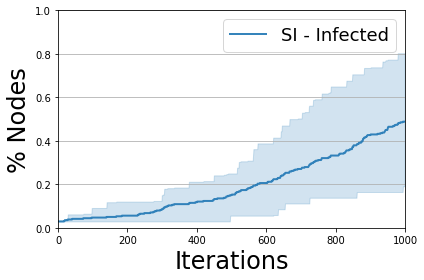

In [10]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIModel as si
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import json
# Network topology
g = nx.karate_club_graph()

from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")

model = si.SIModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.05)

infected_nodes2 = [33]
config.add_model_initial_configuration("Infected", infected_nodes2)
model.set_initial_status(config)

trends = multi_runs(model, execution_number=10, iteration_number=1000, nprocesses=4)

from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model], [trends], statuses=['Infected'])
viz.plot(percentile=90)